## 1. Foreword

Your problem statement will be the guiding force that will influence every question and decision making from this point onward. Before starting any of the exercises get that down.

It would be helpful to refresh the basics of statistical modelling and machine learnin before proceeding, here are the essential concepts that you should understand:

1. Exploratory Data Analysis (EDA):
    - Descriptive statistics (mean, median, variance, quantiles)
    - Understanding distributions and variability 

2. Data Pre-processing
    - Features & Target Transformation
    - Creating new features
    - Feature Selection

3. Regression Models: Linear Regression, Regularized Regression (Ridge, Lasso)
    - Interpreting coefficients, understanding R², MSE, MAE, RMSE

4. Classification Models: Logistic Regression, Decision Trees, Random Forests, SVMs, K-Nearest Neighbors
    - Interpreting probabilities, coefficients (log-odds), and feature importances

5. Evaluation Metrics:
    - For Regression: R², Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE)
    - For Classification: Accuracy, Precision, Recall, F1 Score, ROC-AUC, and Confusion Matrix

6. Model Selection & Validation:
    - Train-test splits, cross-validation techniques
    - Overfitting vs. underfitting
    - Hyperparameter tuning (grid search, random search)

7. Model Interpretability & Explainability:
    - Interpreting model coefficients and feature importance
    - Visualization of decision trees (using plot_tree)
    - Tools like SHAP and LIME for local/global explanations



#### The entire Data Science process would look something like:

1. Exploration: Start with EDA to understand your data. Ask questions about distributions, correlations, and anomalies.
2. Modeling:Build models using core algorithms, evaluate with relevant metrics, and examine model outputs (coefficients, feature importances).
3. Evaluation:Compare metrics against baselines, inspect errors, and assess whether the model meets the problem requirements.
4. Iteration:Use insights from the evaluation to refine feature engineering, adjust preprocessing steps, or try different models.
5. Repeat: Go through this process again—exploration, modeling, evaluation—until you reach the desired balance between performance, interpretability, and practical applicability, based on your problem statement


## 2. Assignment Tasks

1) Define a problem statement
2) Perform EDA (if you are choosing a new dataset)
3) Use EDA Insights for feature selection and feature engineering
4) Create your first 3 models using the framework I provide
5) Evaluate the model and then attempt to improve it
6) Interpret Model results and outputs (coefficients, trees) and continue to add to your insights.
7) Explore 2 new models of your choice. Some suggestions are KNN, SVM for classification & Ridge, Lasso for regression but there are so many more and part of the fun of data science is researching new ways to do things.


Please note that the tasks above are guidelines and this is more of an art than a science. Your specific problem might require some specialized techniques and steps. I implore you to question every characteristic of your dataset and models you encounter and ask "how can I use this to give me insights?" and "what technique can I apply to this to make it useful?".

Good luck and feel free to reach out with any questions.

## 3. Resources
1. Concise explanation for popular Machine learning models : https://www.youtube.com/watch?v=E0Hmnixke2g 
2. Fantastic sklearn algorithms cheat sheet : https://scikit-learn.org/stable/machine_learning_map.html
    - This sklearn tutorial by the sklearn team is amazing too : https://scikit-learn.org/1.4/tutorial/index.html
3. The Python Data Science handbook I linked last assignment has a great machine learning section that should help clear any basics.

These should help you get started but the best way to learn is start the process and when you encounter something you don't fully understand, look that up specifically and apply it. 

## 4. Predictive Modelling 

### Cleaning & Pre-Processing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn import datasets

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# For combining pipelines after encoding
from sklearn.compose import make_column_selector as selector

sns.set(style="whitegrid")

In [46]:
df = pd.read_csv("survey.csv")

Cleaning

In [47]:
df.drop(columns=["Timestamp",'state',"comments","Country"], inplace=True)


In [48]:
# Fill missing 'self_employed' with "Don't know"
df['self_employed'].fillna("Don't know", inplace=True)

# Fill missing 'work_interfere' with "Don't know"
df['work_interfere'].fillna("Don't know", inplace=True)

# Confirm no missing values remain
print("Missing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


C:\Users\shrut\AppData\Local\Temp\ipykernel_17052\2944437288.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['self_employed'].fillna("Don't know", inplace=True)
C:\Users\shrut\AppData\Local\Temp\ipykernel_17052\2944437288.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [ ]:
def clean_gender(gender):
    gender = str(gender).strip().lower()
    
    if gender in ['male', 'm', 'male-ish', 'maile', 'malr', 'cis male', 'cis man', 'male (cis)', 'msle', 'mail', 'make']:
        return 'Male'
    elif gender in ['female', 'f', 'cis female', 'woman', 'femail', 'cis-female/femme', 'female (cis)', 'trans female', 'trans woman']:
        return 'Female'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(clean_gender)

df['Gender'].value_counts()


Gender
Male      988
Female    247
Other      24
Name: count, dtype: int64

In [50]:
# Keep only valid age values
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]

In [51]:
df = df.drop_duplicates()


#### Generating Sample Continuous Data to use regression

This is for demonstration only and doesn't allow for any meaningful regression analysis.


In [ ]:

df_encoded = df.copy()

# Encode categorical columns
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [53]:
# Convert treatment to binary
df_encoded['treatment_binary'] = df['treatment'].map({'Yes': 1, 'No': 0})

# Calculate probability by group
df_encoded['treatment_prob'] = df_encoded.groupby('no_employees')['treatment_binary'].transform('mean')

# Set this as the regression target
target = df_encoded['treatment_prob']

In [54]:
# Features = all columns except the target and original treatment
X = df_encoded.drop(columns=['treatment', 'treatment_binary', 'treatment_prob'])

# Target = continuous regression target
y = df_encoded['treatment_prob']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### A. Regression Models

In [ ]:
# --- Linear Regression ---
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

RMSE: 0.0364
MAE: 0.0305
R² Score: 0.2094


RMSE and MAE values are very low which means the prediction errors are low.
But the R² value is very low which indicates that the predicted model is poor.

In [56]:

# --- Decision Tree Regressor ---
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test)

# Calculate metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mse_dt ** 0.5
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor Performance:")
print(f"RMSE: {rmse_dt:.4f}")
print(f"R² Score: {r2_dt:.4f}")

Decision Tree Regressor Performance:
RMSE: 0.0000
R² Score: 1.0000


Decision Tree Regressor model performs well with r square value of 1 which means the model perfectly fits the test data.

In [57]:
# Initialize the model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor Performance:")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

Random Forest Regressor Performance:
RMSE: 0.0000
R² Score: 1.0000


Random forest model also performs the best with no errors.

### B. Classification Models


Logistic Regression Accuracy: 0.792


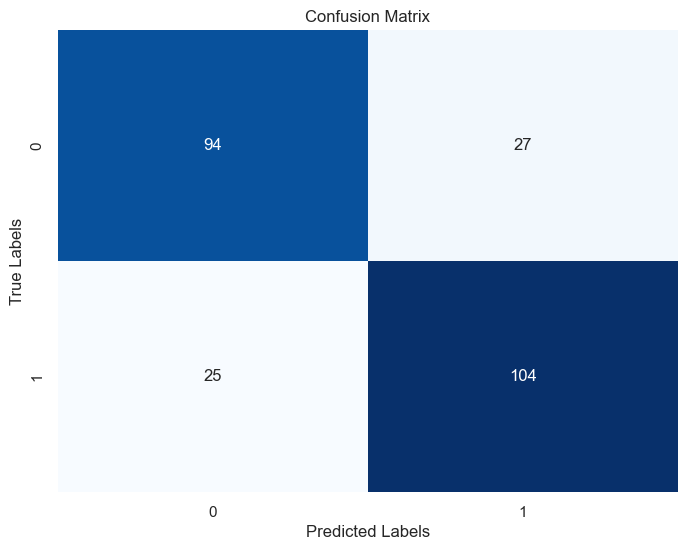

Precision: 0.7938931297709924
Recall: 0.8062015503875969
F1-Score: 0.8


In [58]:
y_class = df['treatment'].map({'Yes': 1, 'No': 0})


# Classification target (binary)
y_class = df['treatment'].map({'Yes': 1, 'No': 0})

# Split dataset for classification
X_train, X_test, y_class_train, y_class_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

# --- Logistic Regression for Classification ---
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on classification target
log_reg.fit(X_train, y_class_train)

# Predict on test data
y_pred_log = log_reg.predict(X_test)

# Accuracy
acc_log = accuracy_score(y_class_test, y_pred_log)
print("Logistic Regression Accuracy:", acc_log)

# Confusion Matrix
cm = confusion_matrix(y_class_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Other metrics
precision = precision_score(y_class_test, y_pred_log)
recall = recall_score(y_class_test, y_pred_log)
f1 = f1_score(y_class_test, y_pred_log)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

In [59]:
# --- Decision Tree Classifier ---
dt_clf = DecisionTreeClassifier(random_state=50, max_depth=5)

# Train the classifier
dt_clf.fit(X_train, y_class_train)

# Predict on test data
y_pred_dt_clf = dt_clf.predict(X_test)

# Accuracy
acc_dt_clf = accuracy_score(y_class_test, y_pred_dt_clf)
print("Decision Tree Classifier Accuracy:", acc_dt_clf)

# Confusion Matrix
cm = confusion_matrix(y_class_test, y_pred_dt_clf)
print("Confusion Matrix:\n", cm)

Decision Tree Classifier Accuracy: 0.784
Confusion Matrix:
 [[106  15]
 [ 39  90]]


Random Forest Classifier Accuracy: 0.8
Confusion Matrix:
 [[ 93  28]
 [ 22 107]]


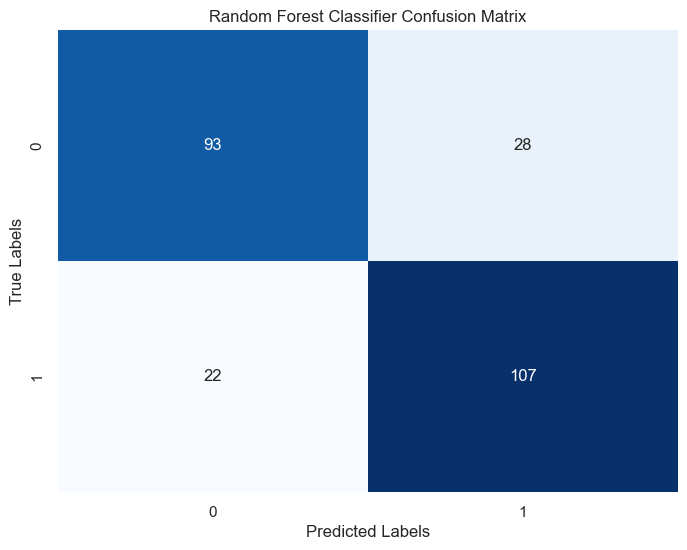

In [60]:
# --- Random Forest Classifier ---
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_class_train)

# Predict on test set
y_pred_rf_clf = rf_clf.predict(X_test)

# Accuracy
acc_rf_clf = accuracy_score(y_class_test, y_pred_rf_clf)
print("Random Forest Classifier Accuracy:", acc_rf_clf)

# Confusion Matrix
cm = confusion_matrix(y_class_test, y_pred_rf_clf)
print("Confusion Matrix:\n", cm)

# Visualization with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Random Forest Classifier Confusion Matrix")
plt.show()

### C. Interpreting Results

#### Regression Coefficients

In [61]:
# Create the model object
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Now get coefficients
coefficients = lin_reg.coef_
coef_series = pd.Series(coefficients, index=X_train.columns)
print("Regression Coefficients:")
print(coef_series.sort_values(ascending=False))


Regression Coefficients:
self_employed                0.019341
obs_consequence              0.007081
care_options                 0.006582
mental_health_interview      0.005056
coworkers                    0.001976
family_history               0.001501
anonymity                    0.001392
mental_health_consequence    0.001161
benefits                     0.001029
seek_help                    0.000781
mental_vs_physical           0.000721
phys_health_interview        0.000719
phys_health_consequence      0.000465
Age                          0.000320
work_interfere              -0.000093
remote_work                 -0.000182
Gender                      -0.001037
wellness_program            -0.001103
leave                       -0.002361
supervisor                  -0.003411
no_employees                -0.008691
tech_company                -0.010070
dtype: float64


#### Log Odds for Logistic Regression

In [62]:
log_odds = log_reg.coef_  # This returns a 2D array (for binary classification, shape is (1, n_features))
log_odds_series = pd.Series(log_odds[0], index=X_train.columns)
print("Logistic Regression Log Odds:")
print(log_odds_series.sort_values(ascending=False))

Logistic Regression Log Odds:
family_history               1.100754
work_interfere               0.917427
obs_consequence              0.733081
benefits                     0.557996
coworkers                    0.548514
care_options                 0.263548
anonymity                    0.155707
mental_health_interview      0.155316
phys_health_interview        0.146065
wellness_program             0.044219
self_employed                0.043491
mental_vs_physical           0.043433
leave                        0.042615
remote_work                  0.037086
Age                          0.017617
mental_health_consequence    0.002106
no_employees                -0.060159
phys_health_consequence     -0.060838
tech_company                -0.075314
supervisor                  -0.164377
seek_help                   -0.294047
Gender                      -0.562529
dtype: float64


#### Visualizing a Decision Tree

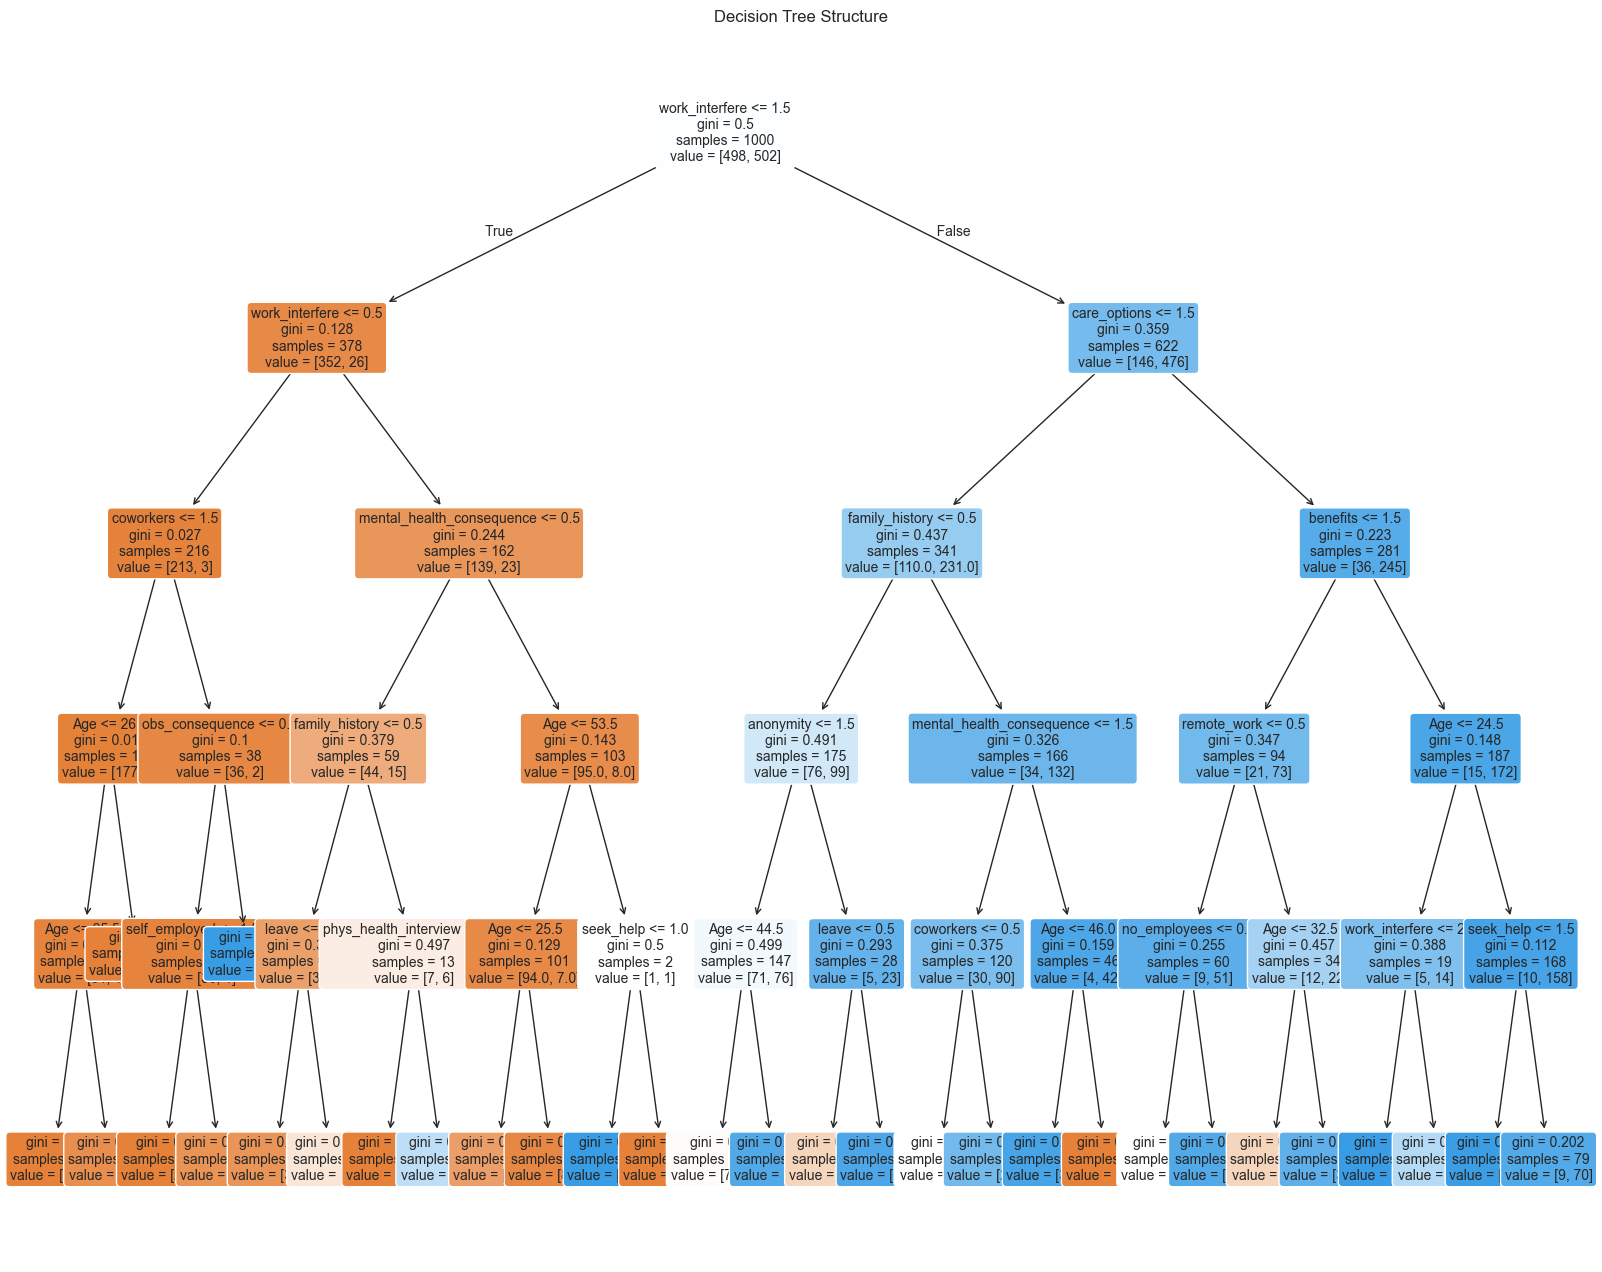

In [63]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 16))
plot_tree(dt_clf, feature_names=X_train.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Structure")
plt.show()

#### Hyperparameter Tuning 

In [64]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid. You can play around with different grids or make a giant one with a lot of numbers.

param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [None, 5, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],       # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}


# Assume rf_reg is your RandomForestRegressor instance
grid_search = GridSearchCV(estimator= dt_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_class_train)


print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validated accuracy:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-Validated accuracy: 0.8140000000000001


In [65]:
results_df = pd.DataFrame(grid_search.cv_results_)

# Display selected columns, e.g., parameters and mean test score
results_df[['params', 'mean_test_score', 'std_test_score']]

params  mean_test_score  \
0    {'criterion': 'gini', 'max_depth': None, 'max_...            0.742   
1    {'criterion': 'gini', 'max_depth': None, 'max_...            0.754   
2    {'criterion': 'gini', 'max_depth': None, 'max_...            0.738   
3    {'criterion': 'gini', 'max_depth': None, 'max_...            0.739   
4    {'criterion': 'gini', 'max_depth': None, 'max_...            0.729   
..                                                 ...              ...   
211  {'criterion': 'entropy', 'max_depth': 20, 'max...            0.756   
212  {'criterion': 'entropy', 'max_depth': 20, 'max...            0.758   
213  {'criterion': 'entropy', 'max_depth': 20, 'max...            0.757   
214  {'criterion': 'entropy', 'max_depth': 20, 'max...            0.757   
215  {'criterion': 'entropy', 'max_depth': 20, 'max...            0.758   

     std_test_score  
0          0.012884  
1          0.019849  
2          0.012083  
3          0.012806  
4          0.016553  
..              ...  
211        0.031369  
212        0.026571  
213        0.027313  
214        0.027313  
215        0.032342  

[216 rows x 3 columns]